# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БВТ2103 Полуян Юлия Александровна
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена

### Выполнение:

In [ ]:
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import copy
from heapq import *
from collections import defaultdict
max_int = float('inf')

def get_path(P, u, v):
    path = [v]
    while v != u:
        v = P[v][u]
        path.append(v)
    return path

#превращение всех 0 матрицы в бесконечности
def toInf(M):
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] == 0:
                M[i][j] = max_int 
    return M   
          
#построение графа по матрице
def showGraph(Matrix, path):
    G = nx.DiGraph(np.matrix(Matrix))
    color_map = []
    for node in G:
        if node in (path):
            color_map.append('aquamarine')
        else:
            color_map.append('salmon')
    pos=nx.circular_layout(G)
    nx.draw(G, pos, node_color=color_map, with_labels=True, arrows=True)
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    return plt.show()

Алгоритм Флойда-Уоршелла

Алгоритм Флойда Уоршелла основан на динамическом программировании и состоит из трех вложенных циклов. На каждой итерации алгоритма проверяются все возможные пути между парами вершин, через текущую вершину. Если такой путь оказывается короче, чем ранее известный кратчайший путь, то он заменяет старый.

[0, 5, 6]
Shortest distance from 0 to 6 = 4


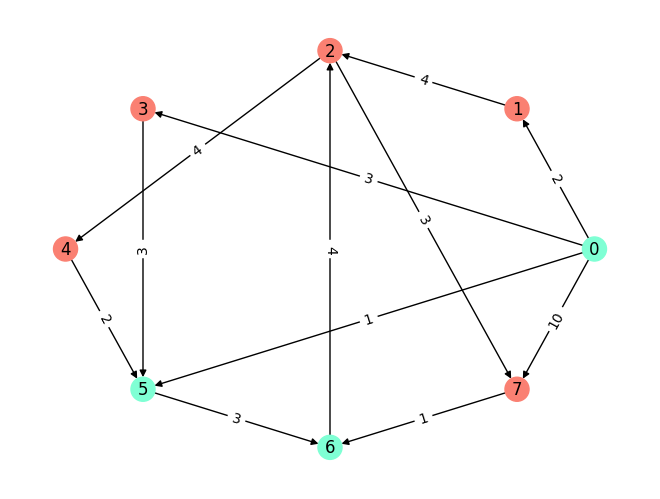

None


In [ ]:
def Floyd(Matr, s, e):
    N = len(Matr)   # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)]  # начальный список предыдущих вершин для поиска кратчайших маршрутов
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = Matr[i][k] + Matr[k][j]
                if Matr[i][j] > d:
                    Matr[i][j] = d
                    P[i][j] = k   # номер промежуточной вершины при движении от i к j
    return get_path(P, e, s)

with open("matrix.txt") as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
start = 0
end = 6
res = Floyd(toInf(Matrix), start, end)
print(res)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = ' + str(d[end]))

with open("matrix.txt") as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, res))


Вспомогательные методы

In [ ]:
from ssl import Options
from sys import path_hooks
from networkx.classes.function import edges

def minDistance(dist, visited):
  (minim, minVertex) = (max_int, 0)
  for vertex in range(len(dist)):
    if minim > dist[vertex] and  visited[vertex] == False:
      (minim, minVertex) = (dist[vertex], vertex)
  return minVertex

Алгоритм Дейкстры

Алгоритм Дейкстры используется для поиска кратчайшего пути в графе с неотрицательными весами ребер. Его можно описать следующим образом:

-- Инициализация: устанавливаем начальную вершину и для каждой вершины графа устанавливаем ее расстояние от начальной вершины на бесконечность, кроме начальной вершины, расстояние которой равно нулю. Все вершины помечаем как непосещенные.

-- Найти вершину с наименьшим текущим расстоянием (т. е. наименьшей оценкой) и пометить ее как посещенную.

-- Для каждой соседней вершины, которая еще не была посещена, проверить, уменьшится ли расстояние до нее, если пройти через текущую вершину. Если да, то обновить ее расстояние.

-- Повторять шаги 2 и 3, пока не будут посещены все вершины или не найден путь до конечной.

Путь может быть восстановлен от обратной трассировки из конечной вершины до начальной, используя информацию о расстояниях до каждой вершины и кратчайших путях.

В итоге, алгоритм Дейкстры находит кратчайшие пути от начальной вершины до всех остальных вершин в графе.

[0, 5, 6]
Shortest distance from 0 to 6 = 4


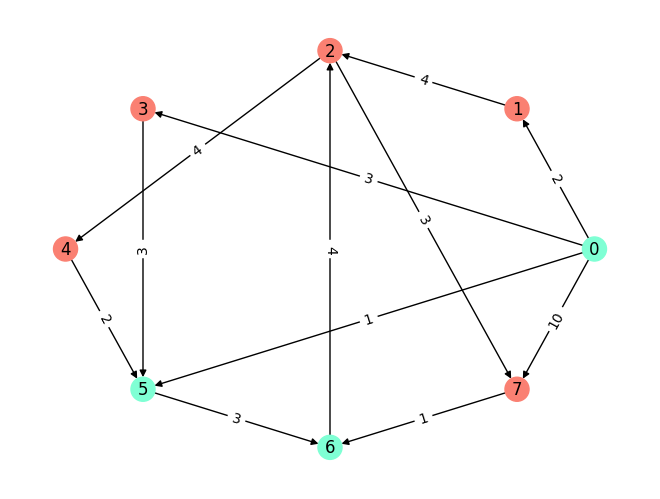

None


In [ ]:

def Dijkstra(graph, modifiedGraph, src, end):
  num_vertices = len(graph)
  sptSet = defaultdict(lambda: False)
  dist = [max_int] * num_vertices
  edges = [[]] * num_vertices

  dist[src] = 0

  for count in range(num_vertices):
    curVertex = minDistance(dist, sptSet)
    sptSet[curVertex] = True

    for vertex in range(num_vertices):
      if((sptSet[vertex] == False) and (dist[vertex] > dist[curVertex] + modifiedGraph[curVertex][vertex])) and (graph[curVertex][vertex] != 0):
        dist[vertex] = (dist[curVertex] + modifiedGraph[curVertex][vertex])
        edges[vertex] = (copy.deepcopy(edges[curVertex] + [vertex]))

  return([src] + edges[end])

p = Dijkstra(Matrix, Matrix, start, end)
print(p)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = ' + str(d[end]))
with open("matrix.txt") as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, res))


Алгоритм Беллмана-Форда



Идея алгоритма заключается в обновлении кратчайших путей из одной вершины во все остальные вершины графа поочередно. Алгоритм выполняет эту операцию n-1 раз, где n - количество вершин в графе.

Для каждой вершины графа сохраняется дистанция - это расстояние от начальной вершины до данной вершины. Изначально все дистанции равны бесконечности, за исключением начальной вершины, для которой дистанция равна 0. В процессе выполнения алгоритма дистанции всех вершин пересчитываются.


[0, 5, 6]
Shortest distance from 0 to 6 = 4


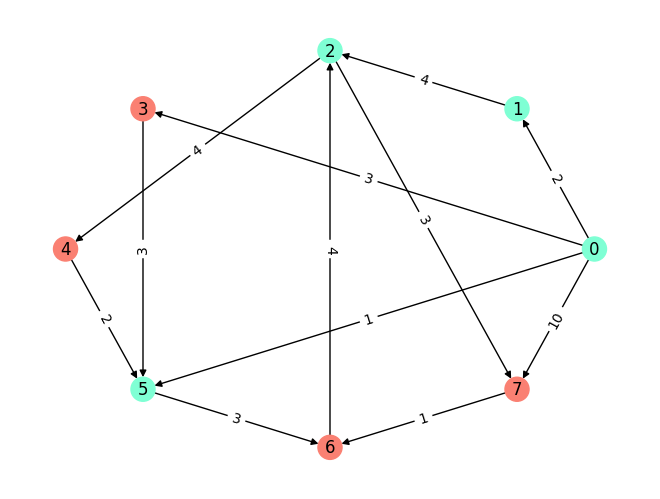

None


In [ ]:
def get_path2(prev, s, e): #восстановление пути из s в e
  path = []
  j = e
  while j != s:
    path.append(j)
    j = prev[j]
  path.append(s)
  path = path[::-1]
  return path

#получение массива с информацией о рёбрах (соединяемые ребром вершины, его вес)
def getEdges(graph):
  edges = []
  for i in range(len(graph)):
      for j in range(len(graph[i])):
        if graph[i][j] != 0:
          edges.append([i, j, graph[i][j]])
  return edges

def BellmanFord(graph, start, forJohnson=False):
  n = len(graph)
  edges = getEdges(graph)
  
  if forJohnson == True:
    for i in range(len(graph)): 
      edges.append([len(graph), i, 0])
      n = n + 1

  dist = [np.Infinity] * n
  dist[start] = 0
  prev = [np.Infinity] * n
  prev[start] = 0

  for i in range(1, n):
    for(src, des, weight) in edges:
      if((dist[src] != np.Infinity) and (dist[src] + weight < dist[des])):
        dist[des] = dist[src] + weight
        prev[des] = src
     
  return prev, dist

p, d = BellmanFord(Matrix, start, end)
print(get_path2(p, start, end))
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(d[end]))


with open("matrix.txt","r") as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]      
print(showGraph(Matrix,p))


Алгоритм Джонсона

Алгоритм основан на добавлении дополнительной вершины к исходному графу, которая будет являться точкой отсчета для всех остальных вершин.

Шаги алгоритма:

-- Добавить дополнительную вершину s в граф G и соединить ее со всеми другими вершинами с нулевым весом.

-- Применить алгоритм Беллмана-Форда к графу G с вершиной s. 

-- Удалить вершину s и перевзвесить все ребра графа так, чтобы вес каждого ребра был неотрицательным.

-- Для каждой вершины v в графе G применить алгоритм Дейкстры с вершиной v.

-- Получить кратчайшие пути от s до всех остальных вершин в графе G, просуммировав пути от s до каждой вершины, полученные на шаге 2, и кратчайшие пути от v до каждой другой вершины, полученные на шаге 4.


[0, 5, 6]
Shortest distance from 0 to 6 = 4


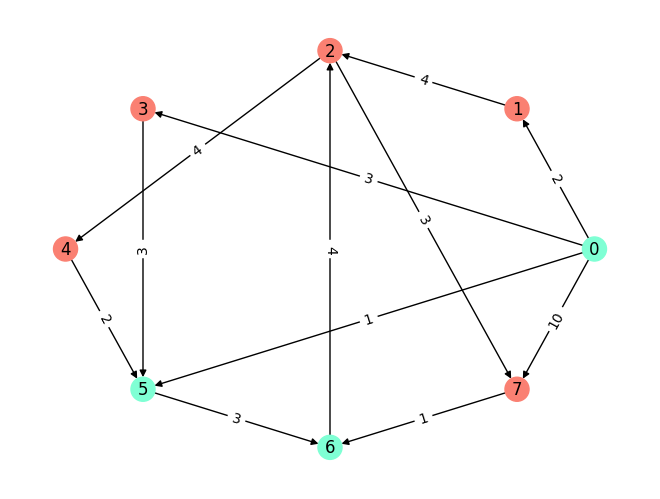

None


In [ ]:
def Johnson(graph, src, endd):
  size = len(graph)
  noP, modifyWeights = BellmanFord(graph, size, True)
  modifiedGraph = [[0 for x in range(len(graph))] for y in range(len(graph))]
  
  for i in range(len(graph)):
    for j in range(len(graph[i])):
      if graph[i][j] != 0:
        modifiedGraph[i][j] = (graph[i][j] + modifyWeights[i] - modifyWeights[j])
  return(Dijkstra(graph, modifiedGraph, src, endd))

p = Johnson(Matrix, start, end)
print(p)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(d[end]))


with open('matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, res))


Алгоритм Левита

Алгоритм Левита - это алгоритм поиска кратчайшего пути в графе, который является модификацией алгоритма Дейкстры.

Алгоритм состоит из трех этапов:

-- Инициализация. Устанавливаем расстояние от начальной вершины до всех остальных равным бесконечности, кроме начальной вершины, расстояние до которой устанавливаем равным 0. Добавляем начальную вершину в очередь с приоритетом.

-- Поиск кратчайшего пути. Пока очередь не пуста, извлекаем первую вершину из очереди. Для каждого соседа текущей вершины вычисляем возможное новое расстояние. Если новое расстояние меньше текущего расстояния, то обновляем расстояние и добавляем вершину в очередь. Если новое расстояние больше или равно текущему расстоянию, то игнорируем этот сосед.

Восстановление пути. Находим минимальное расстояние до конечной вершины и следуем по предшественникам от конечной вершины до начальной.

В отличие от алгоритма Дейкстры, алгоритм Левита работает сразу с несколькими уровнями дерева, что позволяет снизить количество операций.

(0, 5, 6)
Shortest distance from 0 to 6 = 4


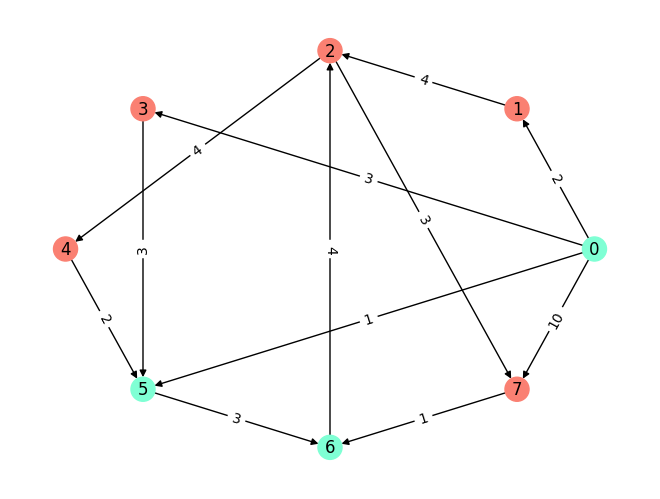

None


In [ ]:
from collections import OrderedDict, defaultdict
from itertools import chain

class IndexedQueue(OrderedDict):
    
    def push(self, item):
        self[item] = None

    def pop(self):
        return OrderedDict.popitem(self, last=False)[0]

restore_path = lambda tup: (*restore_path(tup[1]),tup[0]) if tup else ()

#получение списка смежности
def getAdjacency(graph):
    edges = getEdges(graph)        
    adjacency = defaultdict(list)
    for u, v, w in edges:
        adjacency[u].append((v, w))
    return(adjacency)

#получение массива с информацией о рёбрах (соединяемые ребром вершины, его вес)
def getEdges(graph):
  edges = []
  for i in range(len(graph)):
      for j in range(len(graph[i])):
        if graph[i][j] != 0:
          edges.append([i, j, graph[i][j]])
  return edges

def Levit(graph, start, end=None):
  
    dist = defaultdict(lambda: np.Infinity)
    dist[start] = 0
    path = {start:(start,())}
    #расстояние до вершин вычислено
    m0 = set()
    #расстояние до вершин вычисляется
    m1 = IndexedQueue.fromkeys([start]) #основная очередь
    m1Urg = IndexedQueue() #срочная очередь
    #расстояние ещё не вычислено
    m2 = set(chain.from_iterable((v for v, _ in from_u) for from_u in graph.values())) - {start}
    
    def relax(u, v, w):
        if (dist[v] > dist[u] + w):
            dist[v] = dist[u] + w
            path[v] = (v, path[u])
            return True
        return False

    while m1 or m1Urg:
        u = m1Urg.pop() if m1Urg else m1.pop()
        for v, weight in graph.get(u, ()):
            if v in m2:
                m1.push(v)
                m2.discard(v)
                relax(u, v, weight)
            elif v in m1:
                relax(u, v, weight)
            elif v in m0 and relax(u, v, weight):
                m1Urg.push(v)
                m0.discard(v)
        m0.add(u)
    
    if end is None:
        return dist, path
    elif end in path:
        return dist[end], restore_path(path[end])
    else:
        return inf, ()
                
with open("matrix.txt","r") as f:
    Matrix = [[int(num) for num in line.split(' ')] for line in f]

cost, path = Levit(getAdjacency(Matrix), start, end)
print(path)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(cost))

with open('matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix,path))

Алгоритм Йена

Алгоритм Йена – это алгоритм поиска k кратчайших путей в графе между двумя заданными вершинами. Он основан на поиске одного кратчайшего пути и последующем удалении его ребер и повторном поиске кратчайшего пути на оставшемся графе.

Алгоритм Йена можно описать следующим образом:

-- Выбираем начальную вершину и запускаем алгоритм Дейкстры, чтобы найти кратчайший путь до конечной вершины.

-- Добавляем этот путь в список кратчайших путей.

-- Удаляем ребра, входящие в этот путь, из графа.

-- Повторяем шаги 1-3 k раз, каждый раз ища новый кратчайший путь на измененном графе.

-- Выводим список k кратчайших путей.


In [ ]:
from operator import itemgetter

def Yen(matr, node_start, node_end):
    path = Dijkstra(matr, matr, node_start, node_end)
    distances = Dijkstra(matr, matr, node_start, node_end)
    
    A = [{'cost': distances, 
          'path': path}]
    B = []
    
    if not A[0]['path']: return A

    G = nx.Graph(np.matrix(matr))
    
    for k in range(1, len(matr)):
        for i in range(0, len(A[-1]['path']) - 1):
            node_spur = A[-1]['path'][i]
            path_root = A[-1]['path'][:i+1]
            
            edges_removed = []
            for path_k in A:
                curr_path = path_k['path']
                if len(curr_path) > i and path_root == curr_path[:i+1]:
                    cost = G.remove_edge(curr_path[i], curr_path[i+1])
                    edges_removed.append([curr_path[i], curr_path[i+1], cost])
            
            path_spur = Dijkstra(matr, matr, node_spur, node_end)
            print(path_spur)
            
            if not path_spur:
                path_total = path_root[:-1] + path_spur['path']
                dist_total = distances[node_spur] + path_spur['cost']
                potential_k = {'cost': dist_total, 'path': path_total}
            
                if not (potential_k in B):
                    B.append(potential_k)
            
            for edge in edges_removed:
                G.add_edge(edge[0], edge[1])
        
        if len(B):
            B = sorted(B, key=itemgetter('cost'))
            A.append(B[0])
            B.pop(0)
        else:
            break
    
    return A

with open("matrix.txt","r") as f:
    Matrix = [[int(num) for num in line.split(' ')] for line in f]
    
path = Yen(Matrix, start, end)
print(path)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(cost))






[0, 5, 6]
[5, 6]
[{'cost': [0, 5, 6], 'path': [0, 5, 6]}]
Shortest distance from 0 to 6 = 4


### Вывод

На основе описанных выше алгоритмов, построим таблицу с затраченным временем.

In [ ]:
from prettytable import PrettyTable
import time

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Алгоритм", "Время выполнения", "Время выполнения в матрице 30х30"])
 
start_time=time.time()
FY = Floyd(toInf(Matrix), start, end)
time_FY = format((time.time() - start_time)*1000)

start_time=time.time()
D = Dijkstra(Matrix, Matrix, start, end)
time_D = format((time.time() - start_time)*1000)

start_time=time.time()
BF = BellmanFord(Matrix, start, forJohnson=False)
time_BF = format((time.time() - start_time)*1000)

start_time=time.time()
J = Johnson(Matrix, start, end)
time_J = format((time.time() - start_time)*1000)

start_time=time.time()
L = Levit(getAdjacency(Matrix), start, end)
time_L = format((time.time() - start_time)*1000)

start_time=time.time()
Y = Yen(Matrix, start, end)
time_Y = format((time.time() - start_time)*1000) 

# Add rows
myTable.add_row(["Флойд-Уоршелл", time_FY, "10.45"])
myTable.add_row(["Дейкстра", time_D, "0.45"])
myTable.add_row(["Беллман-Форд", time_BF, "0.13"])
myTable.add_row(["Джонсон", time_J, "11.75"])
myTable.add_row(["Левит", time_L, "1.16"])
myTable.add_row(["Йен", time_Y, "4.49"])

 
print(myTable)

[0, 6]
+---------------+---------------------+----------------------------------+
|    Алгоритм   |   Время выполнения  | Время выполнения в матрице 30х30 |
+---------------+---------------------+----------------------------------+
| Флойд-Уоршелл | 0.39386749267578125 |              10.45               |
|    Дейкстра   |  0.2372264862060547 |               0.45               |
|  Беллман-Форд |  0.347137451171875  |               0.13               |
|    Джонсон    |  0.7104873657226562 |              11.75               |
|     Левит     |  0.2853870391845703 |               1.16               |
|      Йен      |  2.5475025177001953 |               4.49               |
+---------------+---------------------+----------------------------------+


Сложности алгоритмов:

-- Флойд-Уоршелл: **O(V^3)**

-- Дейкстра: **O(V^2)**

-- Беллман-Форд:  **O(V*E)**

-- Джонсон: **O(V^2*log(V)+V*E)**

-- Левит:  **O(V^2+E)**

-- Йен:  **O(kV(E+Vlog(V)))**
